In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [3]:
#load dataset iris
iris = datasets.load_iris()
X = iris.data #Fitur
Y = iris.target #Target

In [18]:
# Mengubah dataset menjadi DataFrame untuk kemudahan analisis
iris_df = pd.DataFrame(data=X, columns=iris.feature_names)
iris_df['target'] = Y

In [19]:
# Step 2: EDA
print("Step 2: Exploratory Data Analysis (EDA)")

# 2.1 Memeriksa informasi dasar tentang dataset
print("Informasi Dataset:")
print(iris_df.info())

Step 2: Exploratory Data Analysis (EDA)
Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB
None


In [20]:
# 2.2 Memeriksa statistik deskriptif
print("\nStatistik Deskriptif:")
print(iris_df.describe())


Statistik Deskriptif:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  


<Figure size 1200x600 with 0 Axes>

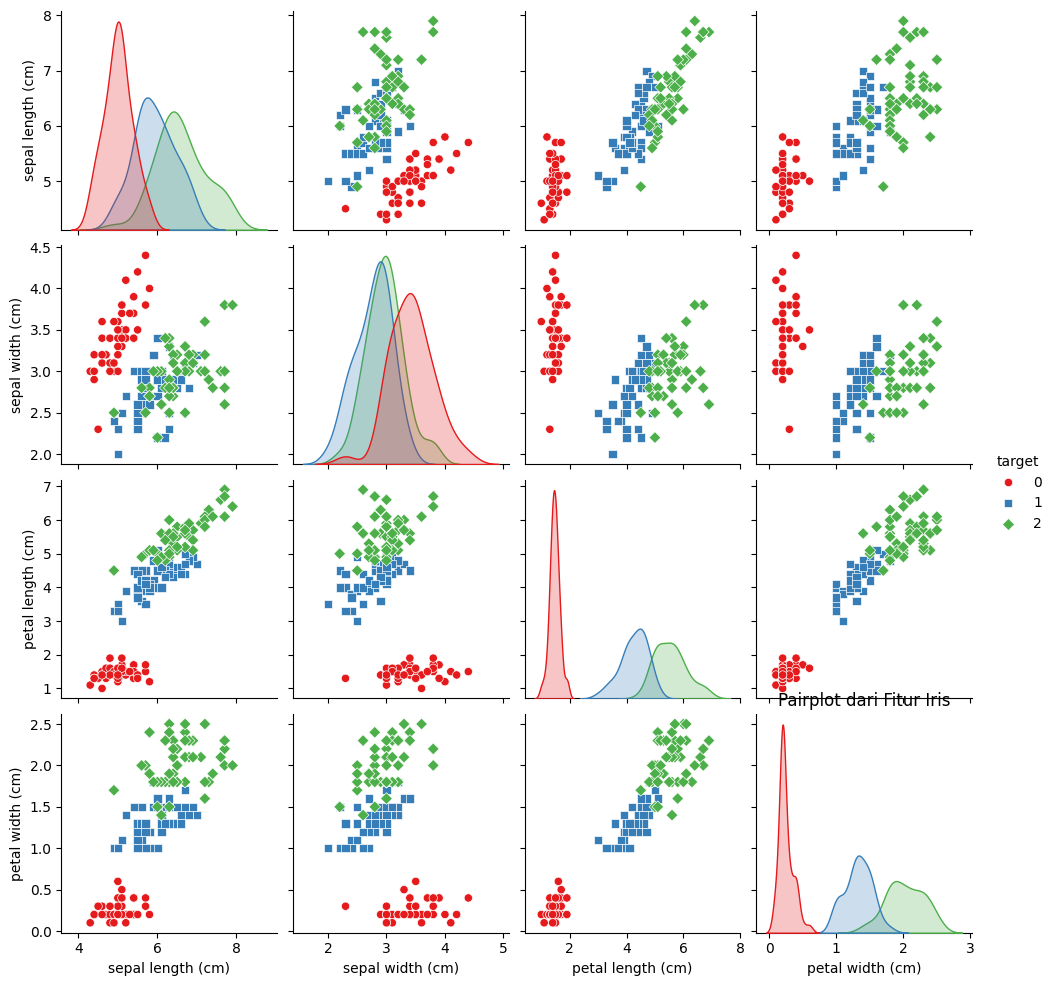

In [21]:
# 2.3 Memvisualisasikan distribusi fitur
plt.figure(figsize=(12, 6))
sns.pairplot(iris_df, hue='target', palette='Set1', markers=["o", "s", "D"])
plt.title("Pairplot dari Fitur Iris")
plt.show()


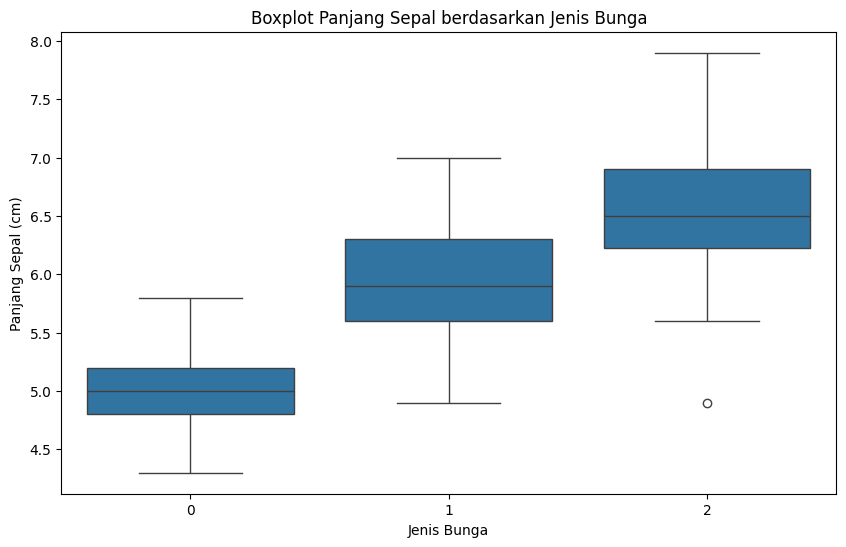

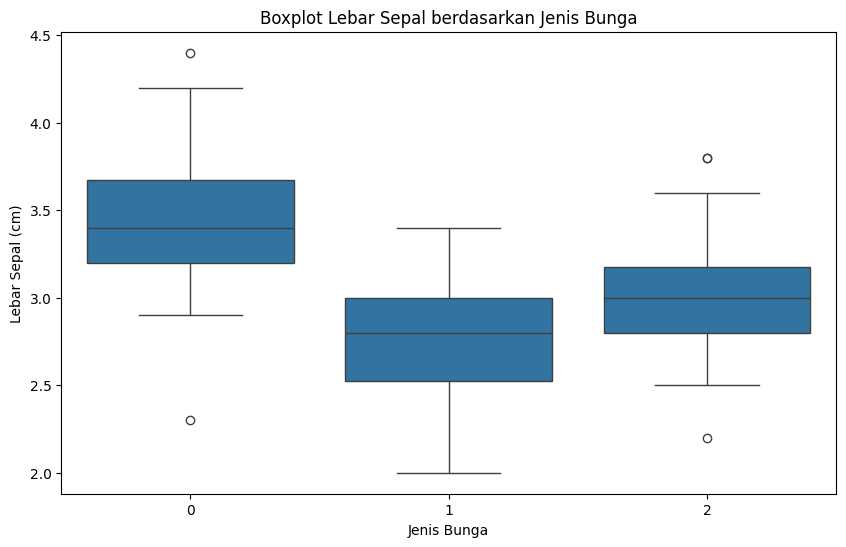

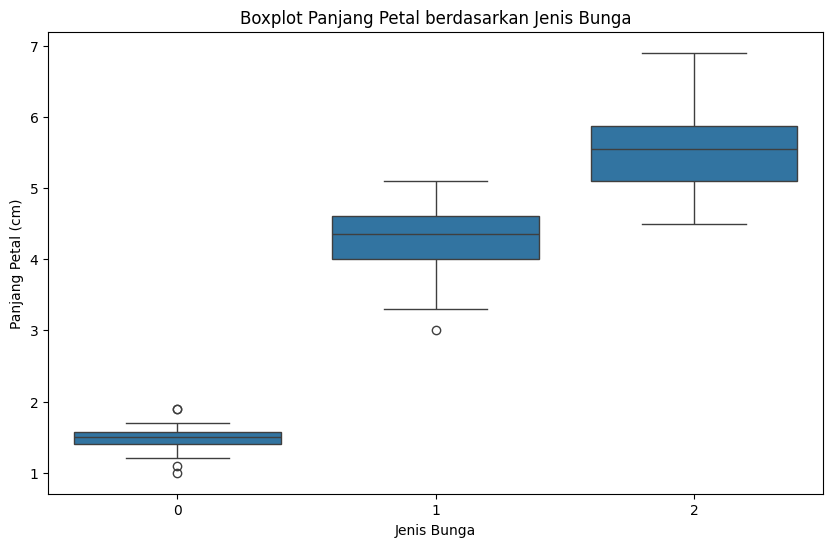

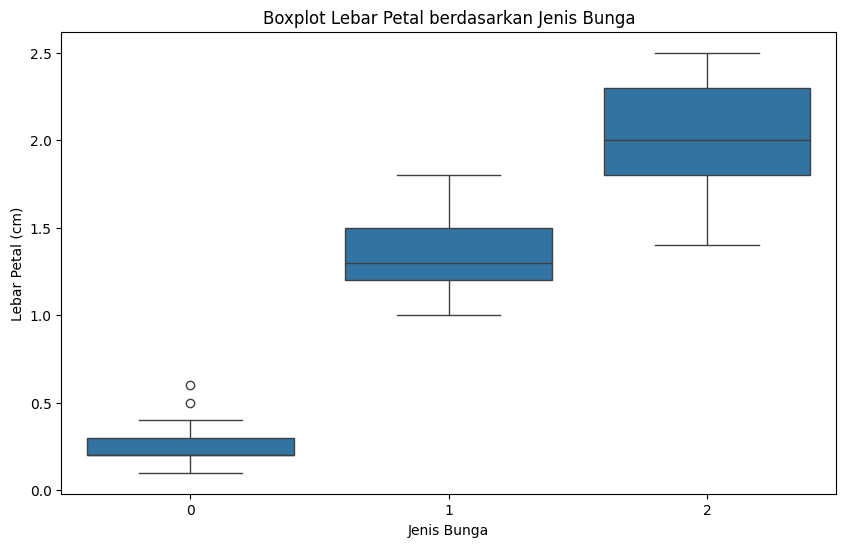

In [24]:
# 2.4 Memvisualisasikan hubungan antara fitur dan target
plt.figure(figsize=(10, 6))
sns.boxplot(x='target', y='sepal length (cm)', data=iris_df)
plt.title("Boxplot Panjang Sepal berdasarkan Jenis Bunga")
plt.xlabel("Jenis Bunga")
plt.ylabel("Panjang Sepal (cm)")
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='target', y='sepal width (cm)', data=iris_df)
plt.title("Boxplot Lebar Sepal berdasarkan Jenis Bunga")
plt.xlabel("Jenis Bunga")
plt.ylabel("Lebar Sepal (cm)")
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='target', y='petal length (cm)', data=iris_df)
plt.title("Boxplot Panjang Petal berdasarkan Jenis Bunga")
plt.xlabel("Jenis Bunga")
plt.ylabel("Panjang Petal (cm)")
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='target', y='petal width (cm)', data=iris_df)
plt.title("Boxplot Lebar Petal berdasarkan Jenis Bunga")
plt.xlabel("Jenis Bunga")
plt.ylabel("Lebar Petal (cm)")
plt.show()

In [25]:
#Membagi dataset menjadi data latih dan data uji
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=43)

In [26]:
#Membuat model KNN
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=3)

In [27]:
#memprediksi data uji
Y_pred = model.predict(X_test)

#menghitung akurasi
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Akurasi model KNN: {accuracy * 100:.2f}%")

Akurasi model KNN: 100.00%


In [28]:
def predict_iris(sepal_length, sepal_width, petal_length, petal_width):
  features = [[sepal_length, sepal_width, petal_length, petal_width]]
  prediction = model.predict(features)
  return iris.target_names[prediction[0]]

In [30]:
!pip install gradio --upgrade  # Upgrade to the latest version of Gradio

import gradio as gr

# Membuat antarmuka Gradio
iface = gr.Interface(
    fn=predict_iris,
    inputs=[
        gr.Slider(minimum=0.0, maximum=10.0, label="Panjang Sepal (cm)"), # Use gr.Slider instead of gr.inputs.Slider
        gr.Slider(minimum=0.0, maximum=10.0, label="Lebar Sepal (cm)"),  # Use gr.Slider instead of gr.inputs.Slider
        gr.Slider(minimum=0.0, maximum=10.0, label="Panjang Petal (cm)"), # Use gr.Slider instead of gr.inputs.Slider
        gr.Slider(minimum=0.0, maximum=10.0, label="Lebar Petal (cm)")   # Use gr.Slider instead of gr.inputs.Slider
    ],
    outputs="text",
    title="Prediksi Jenis Bunga Iris",
    description="Masukkan panjang dan lebar sepal serta petal untuk memprediksi jenis bunga iris."
)

# Menjalankan antarmuka
iface.launch()

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://05c12fed322040eb41.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
